In [ ]:
import seaborn
from matplotlib import pyplot as plt
import time
import arviz as az
import numpy as np
import pymc as pm
#from src.baseSIR import real_sir
rng = np.random.default_rng(1690)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [ ]:
def real_sir(X0,mu,beta,gamma,tmax,tstep): #define a SIR Model with births and deaths. There are 6 possible events here: birth; S death; I death; R death; infection; recovery
    """
    :param X0: Initial Conditions for reality
    :param mu: Birth/death rate
    :param beta: Infection rate
    :param gamma: Recovery rate
    :param tmax: length of simulation#
    :return: X(tmax)
    """

    #initilise the required arrays

    t = 0.0
    X = np.array(X0)
    sol = np.array([X0])
    counter = 0.0


    # Run
    while(t<tmax):
        N = X[0] + X[1] + X[2]
        Rt = (beta*X[0]*X[1]/N)
        Rr = gamma*X[1]
        Rds = (mu*X[0])
        Rdi = (mu*X[1])
        Rdr = (mu*X[2])
        Rb = (mu*N)
        Rtotal = Rt + Rr + Rds + Rdr + Rdi + Rb
        if Rtotal != 0:
            u = rng.exponential(1/Rtotal)
            t = t + u
            counter += u
            #times = np.append(times,t)

            # chose the event

            z = rng.random()
            P = z*Rtotal
            fil = np.array([Rt,Rt+Rr,Rt+Rr+Rds,Rt+Rr+Rds+Rdi,Rt+Rr+Rds+Rdi+Rdr,Rt+Rr+Rds+Rdi+Rdr+Rb])
            event = min(i for i in fil if i >= P)
            if event == fil[0]:
                X = X + [-1,1,0]

            elif event == fil[1]:
                X = X + [0,-1,1]
            elif event == fil[2]:
                X = X + [-1,0,0]
            elif event == fil[3]:
                X = X + [0,-1,0]
            elif event == fil[4]:
                X = X + [0,0,-1]
            else:
                X = X + [1,0,0]
        else:
            r_t = tmax - t
            r_step = int(r_t/tstep)
            for i in range(r_step):
                sol = np.append(sol,[X],axis=0)
            return sol
        while counter >= tstep:
            counter = counter - tstep
            sol = np.append(sol,[X],axis=0)
    while len(sol) > tmax/tstep:
        sol = np.delete(sol,-1,0)
    out = sol
    return out

In [ ]:
X0 = [950,50,0]
beta = 3
gamma = 1
mu = 0
tmax = 10
tstep = 0.05

rng = np.random.default_rng(1690)
start_time = time.time()
reality = real_sir(X0, mu, beta, gamma, tmax,tstep)
print(f"Reality took {time.time() - start_time} seconds to run!")
times = np.arange(0,tmax,tstep)

Reality took 0.024152755737304688 seconds to run!


C:\Users\ollie\AppData\Local\Temp\ipykernel_2968\1811503437.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


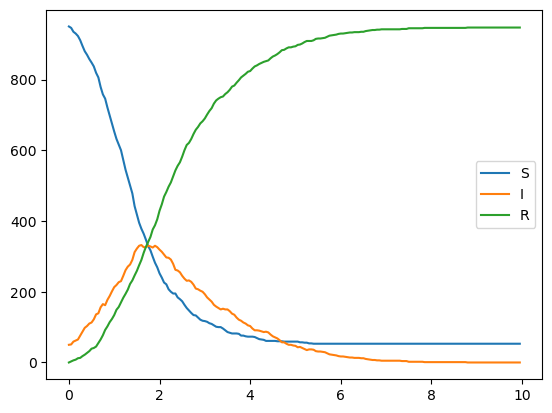

In [ ]:
fig, ax0 = plt.subplots()
ax0.plot(times,reality, label = ["S","I","R"])
ax0.legend()
fig.show()

In [ ]:
def sim_sir(rng,b,g,size = None):
    return real_sir(X0,mu,b,g,tmax,tstep) * factor

In [ ]:
#X0 = [95,5,0]
#mu = 0
#tmax = 10
#tstep = 0.05
#factor = 10
#start_time = time.time()
#with pm.Model() as test:
#    b = pm.HalfNormal("b",5)
#    g = pm.HalfNormal("g",5)
#    s = pm.Simulator("s", sim_sir,params = (b,g), epsilon = 1000, observed= reality)
#    idata = pm.sample_smc(progressbar=False)
#print(f"Reality took {time.time() - start_time} seconds to fit!")

In [ ]:
#save = idata.posterior.b
#np.savetxt("../Data/TestX10.csv",save , delimiter=",")
#save2 = np.genfromtxt("../Data/TestX10.csv",delimiter=",")

In [ ]:
#az.plot_posterior(idata)

In [10]:
X0 = [9,1,0]
mu = 0
tmax = 10
tstep = 0.05
factor = 100
start_time = time.time()
with pm.Model() as test:
    b = pm.HalfNormal("b",5)
    g = pm.HalfNormal("g",5)
    s = pm.Simulator("s", sim_sir,params = (b,g), epsilon = 1000, observed= reality)
    idata2 = pm.sample_smc(progressbar=False)
print(f"Reality took {time.time() - start_time} seconds to fit!")




Initializing SMC sampler...
Sampling 6 chains in 6 jobs
C:\Users\ollie\anaconda3\envs\PLS Research\lib\site-packages\arviz\data\base.py:221: UserWarning: More chains (6) than draws (5). Passed array should have shape (chains, draws, *shape)
  warnings.warn(


Reality took 145.8391854763031 seconds to fit!


ValueError: Expected 1D or 2D array, got 3D array instead

array([<Axes: title={'center': 'b'}>, <Axes: title={'center': 'g'}>],
      dtype=object)

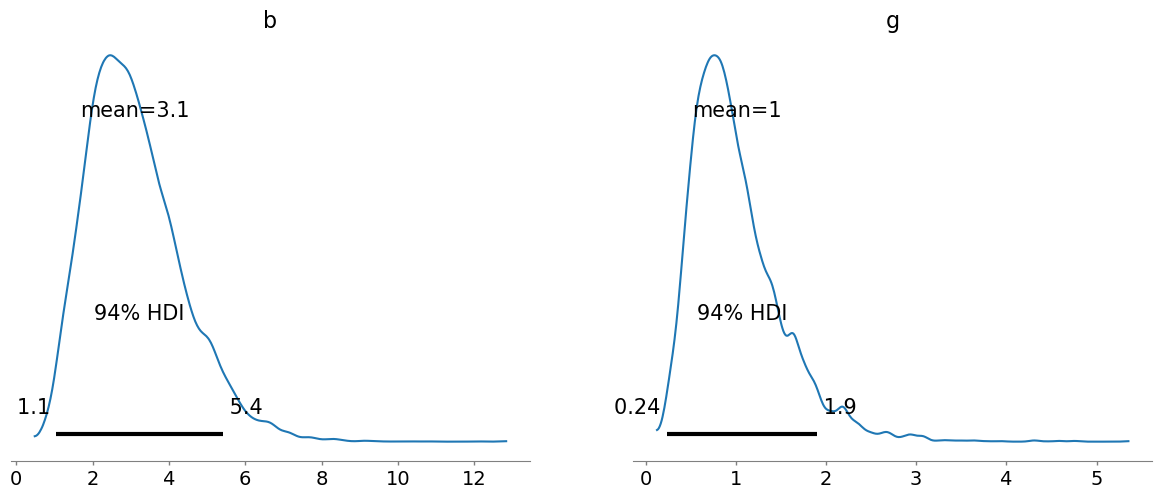

In [11]:
az.plot_posterior(idata2)

In [12]:
bsave = idata2.posterior.b
gsave = idata2.posterior.g
np.savetxt("../Data/Test_b.csv",bsave , delimiter=",")
np.savetxt("../Data/Test_g.csv",gsave , delimiter=",")

1.026020123000593


array([[<Axes: title={'center': 'x'}>]], dtype=object)

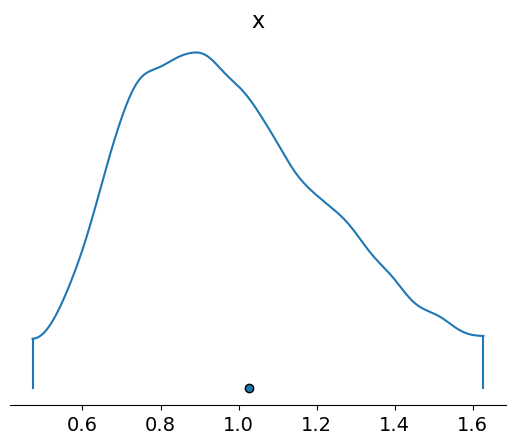

In [31]:
test_data_b = np.genfromtxt("../Data/Traj_1_N_10_b.csv", delimiter=",")
test_data_g = np.genfromtxt("../Data/Traj_1_N_1000_g.csv", delimiter=",")
print(np.mean(test_data_g))
az.plot_density(test_data_g)